2021-08-11 00:00:00 174,30
2021-08-12 00:00:00 112,29
2021-08-15 00:00:00 110,35
2021-08-17 00:00:00 158,24
2021-08-19 00:00:00 117,27
2021-08-22 00:00:00 105,26
2021-08-24 00:00:00 95,31
2021-08-26 00:00:00 135,34
2021-08-29 00:00:00 112,33
2021-08-31 00:00:00 157,32
2021-09-02 00:00:00 143,34
2021-09-06 00:00:00 175,28
2021-09-07 00:00:00 209,27
2021-09-09 00:00:00 182,29
2021-09-12 00:00:00 87,24
2021-09-14 00:00:00 137,29
2021-09-16 00:00:00 131,28
2021-09-21 00:00:00 146,34
2021-09-23 00:00:00 145,34
2021-09-28 00:00:00 129,32
2021-09-30 00:00:00 122,30
2021-10-05 00:00:00 140,32
Average Total Time of Schedule Rule Release 137.3181818181818
Average no of RuleApps participating 30.09090909090909


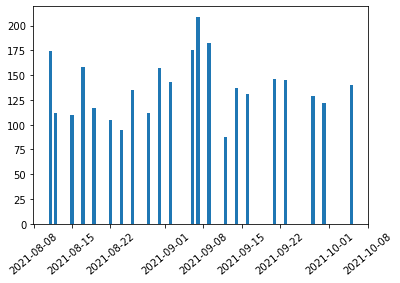

In [95]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
release_time = []
dates = []
ruleapps_count = []
d = {}
for f in os.listdir("/Users/skumar6/git/rr_data/batch-rule-release-stats/csv"):
    df = pd.read_csv("/Users/skumar6/git/rr_data/batch-rule-release-stats/csv/"+f)
    isScheduleRR = df.isScheduledRuleRelease
    if 'True' in str(isScheduleRR):
        tt_time = int(str(df.timeTakenInSeconds).split()[1].strip())
        baseline = str(df.baseline).split()
        date = datetime.strptime(baseline[1].split("_")[0],'%Y%m%d')
        no_ruleapps = len(df.changedRuleApps.values[0].split())
#         date = baseline[1].split("_")[0][4:]
        d[date] = str(tt_time//60 - 30) + "," + str(no_ruleapps)
#         print(date)
d_v_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
for i in sorted(d.keys()):
    dates.append(i)
    release_time.append(int(d[i].split(",")[0]))
    ruleapps_count.append(int(d[i].split(",")[1]))
    print(i,end=' ')
    print(d[i])
print("Average Total Time of Schedule Rule Release",end=' ')
print((sum(release_time)/len(release_time)))
print("Average no of RuleApps participating",end=' ')
print((sum(ruleapps_count)/len(ruleapps_count)))
# print(df.columns.values)
plt.bar(dates,release_time,width=0.6)
plt.xticks(rotation=40)
plt.show()

In [ ]:
baseline' 'changedRuleApps' 'childJobs' 'endTime' 'exceptions'
 'failedRuleApps' 'id' 'isScheduledRuleRelease' 'jobExecutionId'
 'jobParams' 'name' 'ruleAppInfoMap' 'startTime' 'status' 'stepDetails'
 'submittedRuleApps' 'succeededRuleApps' 'timeTakenInSeconds'

In [90]:
df1 = pd.read_csv("/Users/skumar6/git/rr_data/batch-rule-release-stats/csv/jobExecution_consolidated_95069.csv")
print(len(df1.changedRuleApps.values[0].split()))

32
